In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pl.read_parquet('projecao_populacao_2000_2070.parquet')

In [3]:
df.head()

grupo_etario,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
""" 00-04""",17281547,17123682,16906493,16640256,16343284,16051105,15806173,15551584,15329999,15140576,14926565,14732570,14645770,14585062,14577213,14679432,14705019,14647172,14636517,14570633,14349330,14102904,13820837,13421242,13017992,12674414,12380087,12136911,11925707,11724741,11547274,11387815,11242466,11109355,10986850,10873117,10766566,10665345,10568366,10474635,10382826,10292025,10202128,10112750,10023192,9933056,9842172,9750554,9657732,9562852,9465427,9365666,9263843,9159606,9052463,8942514,8830712,8718377,8606226,8494854,8385560,8279456,8177111,8079433,7987391,7901241,7820627,7744772,7673320,7606268,7543093
""" 05-09""",17378990,17390172,17379924,17349975,17303761,17217876,17064624,16851635,16589485,16296374,16004125,15753231,15491395,15260323,15057076,14841043,14662314,14581565,14518069,14506665,14609239,14638890,14588148,14589745,14531027,14303619,14048266,13766965,13377961,12980620,12642552,12353311,12114564,11907006,11708545,11532031,11372430,11226909,11093601,10970904,10856939,10750226,10648948,10552061,10458544,10367093,10276714,10187204,10098226,10009063,9919300,9828783,9737507,9645040,9550503,9453413,9353993,9252488,9148544,9041733,8932109,8820606,8708567,8596707,8485608,8376598,8270750,8168636,8071186,7979360,7893433
""" 10-14""",17599378,17471598,17382310,17339680,17333773,17348818,17360770,17351252,17322069,17276557,17190853,17038072,16826125,16564772,16271685,15981250,15735526,15476458,15246274,15044385,14830142,14653596,14575329,14515508,14505688,14606009,14632529,14580321,14582319,14523060,14295224,14039540,13758104,13369136,12971860,12633768,12344382,12105432,11897649,11698969,11522206,11362393,11216781,11083480,10960890,10847158,10740735,10639728,10543088,10449800,10358572,10268418,10179144,10090395,10001431,9911890,9821580,9730508,9638227,9543886,9446978,9347726,9246401,9142645,9036015,8926567,8815236,8703349,8591634,8480688,8371817
""" 15-19""",17831344,17866394,17852790,17786266,17669276,17529669,17403541,17315686,17274236,17269246,17259413,17243723,17229588,17206161,17167306,17083436,16928752,16710472,16442716,16161907,15893053,15663254,15402409,15169410,14971635,14763017,14593065,14521488,14468158,14464297,14570091,14600441,14550009,14552534,14493550,14266334,14011233,13730329,13342170,12945738,12608347,12319635,12081344,11874231,11676304,11500343,11341350,11196483,11063895,10941968,10828856,10723045,10622614,10526515,10433758,10343047,10253385,10164609,10076329,9987833,9898732,9808849,9718189,9626310,9532355,9435826,9336980,9236029,9132638,9026379,8917283
""" 20-24""",16402228,16826765,17170628,17423254,17594842,17692430,17729519,17718310,17653664,17537757,17342029,17119673,16972759,16901546,16881653,16884209,16881225,16849457,16789776,16747832,16702146,16592992,16396616,16138175,15865912,15601880,15386894,15162593,14970007,14806068,14630502,14488996,14437542,14397410,14400712,14508531,14539427,14489752,14492739,14434432,14208503,13954789,13675492,13289639,12895768,12560773,12274276,12037950,11832589,11636346,11461973,11304429,11160921,11029622,10908928,10796985,10692279,10592900,10497828,10406038,10316293,10227566,10139675,10052257,9964592,9876311,9787218,9697332,9606213,9512994,9417186


In [4]:
df_tidy = df.unpivot(
    index='grupo_etario',
    on=[str(x) for x in range(2000, 2071)],
    variable_name='ano',
    value_name='populacao'
).with_columns(
    pl.col('ano').cast(pl.Int64)
)

In [5]:
df_tidy.head()

grupo_etario,ano,populacao
str,i64,i64
""" 00-04""",2000,17281547
""" 05-09""",2000,17378990
""" 10-14""",2000,17599378
""" 15-19""",2000,17831344
""" 20-24""",2000,16402228


In [6]:
print(sorted(df_tidy.select(pl.col('grupo_etario')).unique().to_series().to_list()))

[' 00-04', ' 05-09', ' 10-14', ' 15-19', ' 20-24', ' 25-29', ' 30-34', ' 35-39', ' 40-44', ' 45-49', ' 50-54', ' 55-59', ' 60-64', ' 65-69', ' 70-74', ' 75-79', ' 80-84', ' 85-89', '90+']


In [7]:
df_jovem = df_tidy.filter(
    pl.col('grupo_etario').is_in([' 15-19', ' 20-24', ' 25-29'])
)

In [8]:
df_jovem.head()

grupo_etario,ano,populacao
str,i64,i64
""" 15-19""",2000,17831344
""" 20-24""",2000,16402228
""" 25-29""",2000,14351864
""" 15-19""",2001,17866394
""" 20-24""",2001,16826765


In [9]:
df_idoso = df_tidy.filter(
    pl.col('grupo_etario').is_in([
        ' 60-64', ' 65-69', ' 70-74', 
        ' 75-79', ' 80-84', ' 85-89', '90+'
    ])
)

In [10]:
df_idoso.head()

grupo_etario,ano,populacao
str,i64,i64
""" 60-64""",2000,4702598
""" 65-69""",2000,3678357
""" 70-74""",2000,2861050
""" 75-79""",2000,1955661
""" 80-84""",2000,1148811


In [11]:
sorted(df_idoso.select('grupo_etario').unique().to_series().to_list())

[' 60-64', ' 65-69', ' 70-74', ' 75-79', ' 80-84', ' 85-89', '90+']

In [12]:
df_idoso_6069 = df_idoso.filter(
    pl.col('grupo_etario').is_in([' 60-64', ' 65-69'])
).with_columns(
    pl.lit('60-69').alias('grupo_etario')
).group_by(['grupo_etario', 'ano']).agg(
    pl.col('populacao').sum()
)

In [13]:
df_idoso_6069.head()

grupo_etario,ano,populacao
str,i64,i64
"""60-69""",2027,20347388
"""60-69""",2038,24489576
"""60-69""",2029,21166094
"""60-69""",2037,23966599
"""60-69""",2043,27502965


In [14]:
df_idoso_7079 = df_idoso.filter(
    pl.col('grupo_etario').is_in([' 70-74', ' 75-79'])
).with_columns(
    pl.lit('70-79').alias('grupo_etario')
).group_by(['grupo_etario', 'ano']).agg(
    pl.col('populacao').sum()
)

In [15]:
df_idoso_7079.head()

grupo_etario,ano,populacao
str,i64,i64
"""70-79""",2052,23026778
"""70-79""",2004,5372935
"""70-79""",2058,25318410
"""70-79""",2067,25241900
"""70-79""",2045,19476343


In [16]:
df_idoso_8090 = df_idoso.filter(
    pl.col('grupo_etario').is_in([' 80-84', ' 85-89', '90+'])
).with_columns(
    pl.lit('80-90+').alias('grupo_etario')
).group_by(['grupo_etario', 'ano']).agg(
    pl.col('populacao').sum()
)

In [17]:
df_idoso_8090.head()

grupo_etario,ano,populacao
str,i64,i64
"""80-90+""",2028,5688584
"""80-90+""",2067,21936242
"""80-90+""",2058,17582138
"""80-90+""",2030,6259435
"""80-90+""",2042,10922339


In [18]:
df_concated = pl.concat([
    df_jovem,
    df_idoso_6069,
    df_idoso_7079,
    df_idoso_8090
], how='vertical')

In [19]:
df_concated

grupo_etario,ano,populacao
str,i64,i64
""" 15-19""",2000,17831344
""" 20-24""",2000,16402228
""" 25-29""",2000,14351864
""" 15-19""",2001,17866394
""" 20-24""",2001,16826765
…,…,…
"""80-90+""",2053,15437488
"""80-90+""",2059,18114185
"""80-90+""",2038,9170052


In [20]:
df_pd = df_concated.to_pandas()

In [21]:
anos = sorted(df_concated.select('ano').unique().to_series().to_list())

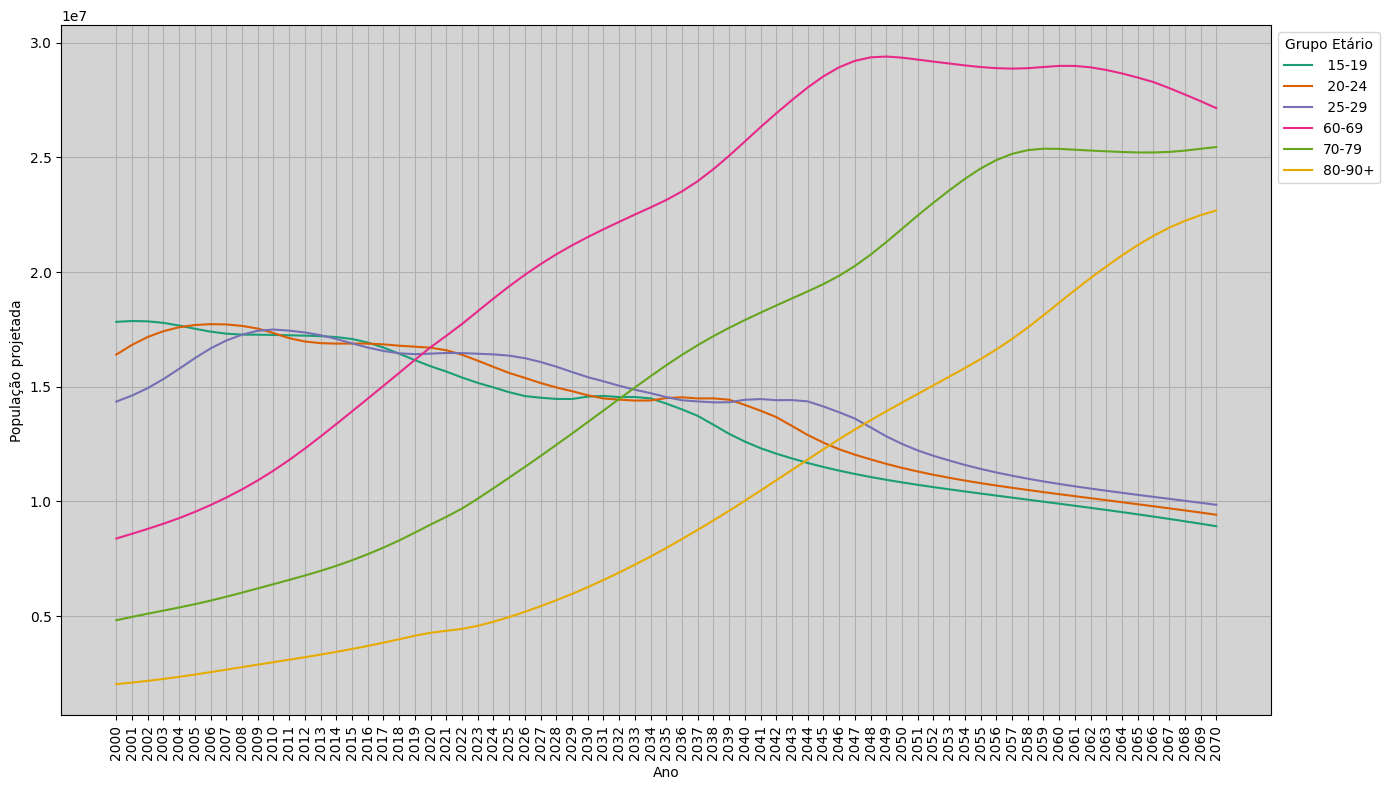

In [22]:
fig, ax = plt.subplots(figsize=(14, 8))

sns.lineplot(
    df_pd,
    x='ano',
    y='populacao',
    hue='grupo_etario',
    ax=ax,
    palette='Dark2'
)

ax.tick_params('x', rotation=90)
ax.set_xticks(anos)
ax.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Grupo Etário")
ax.set_ylabel('População projetada')
ax.set_xlabel('Ano')
ax.grid()
ax.set_facecolor('lightgray')

plt.tight_layout()
fig.savefig('projecao_populacao_grupo_etario_ano.png', dpi=300, bbox_inches='tight')
plt.show()